In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [3]:
register_matplotlib_converters()
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

In [4]:
test_data = pd.read_csv('/Users/baconbaker/Documents/Studium/ANM/anm-project/data/test_data/esb.csv')
train_data = pd.read_csv('/Users/baconbaker/Documents/Studium/ANM/anm-project/data/train_data/esb.csv')
train_data['start_time'] = train_data['startTime']
print(train_data.head())
print(test_data.head())

  serviceName      startTime  avg_time  num  succee_num  succee_rate  \
0     osb_001  1588521600000    0.5691  347         347          1.0   
1     osb_001  1588521660000    0.5813  354         354          1.0   
2     osb_001  1588521720000    0.5397  363         363          1.0   
3     osb_001  1588521780000    0.6190  387         387          1.0   
4     osb_001  1588521840000    0.4909  387         387          1.0   

      start_time  
0  1588521600000  
1  1588521660000  
2  1588521720000  
3  1588521780000  
4  1588521840000  
  service_name     start_time  avg_time  num  succee_num  succee_rate
0      osb_001  1606881600000    0.6214  361         361       1.0000
1      osb_001  1606881660000    0.5861  343         343       1.0000
2      osb_001  1606881720000    5.0125  126         122       0.9683
3      osb_001  1606881780000    9.3487   70          70       1.0000
4      osb_001  1606881840000    1.4756  375         375       1.0000


In [5]:
def get_onehot(df):
    df['start_time'] = pd.to_datetime(df['start_time'], unit='ms', origin='unix')
    df = df.sort_values(by='start_time')
    df = df.set_index('start_time')
    return df

In [6]:
test_data

,service_name,start_time,avg_time,num,succee_num,succee_rate
0,osb_001,1606881600000,0.6214,361,361,1.0000
1,osb_001,1606881660000,0.5861,343,343,1.0000
2,osb_001,1606881720000,5.0125,126,122,0.9683
3,osb_001,1606881780000,9.3487,70,70,1.0000
4,osb_001,1606881840000,1.4756,375,375,1.0000
...,...,...,...,...,...,...
714,osb_001,1606866840000,0.6631,539,539,1.0000
715,osb_001,1606866900000,0.6083,542,542,1.0000
716,osb_001,1606866960000,0.5766,536,536,1.0000
717,osb_001,1606867020000,0.6536,525,525,1.0000


In [7]:
train_data

,serviceName,startTime,avg_time,num,succee_num,succee_rate,start_time
0,osb_001,1588521600000,0.5691,347,347,1.0,1588521600000
1,osb_001,1588521660000,0.5813,354,354,1.0,1588521660000
2,osb_001,1588521720000,0.5397,363,363,1.0,1588521720000
3,osb_001,1588521780000,0.6190,387,387,1.0,1588521780000
4,osb_001,1588521840000,0.4909,387,387,1.0,1588521840000
...,...,...,...,...,...,...,...
1434,osb_001,1588607700000,0.6240,600,600,1.0,1588607700000
1435,osb_001,1588607760000,0.5897,643,643,1.0,1588607760000
1436,osb_001,1588607820000,0.6495,619,619,1.0,1588607820000
1437,osb_001,1588607880000,0.6262,614,614,1.0,1588607880000


In [8]:
from statsmodels.tsa.seasonal import STL

157.29722482847745 -176.15354947591823


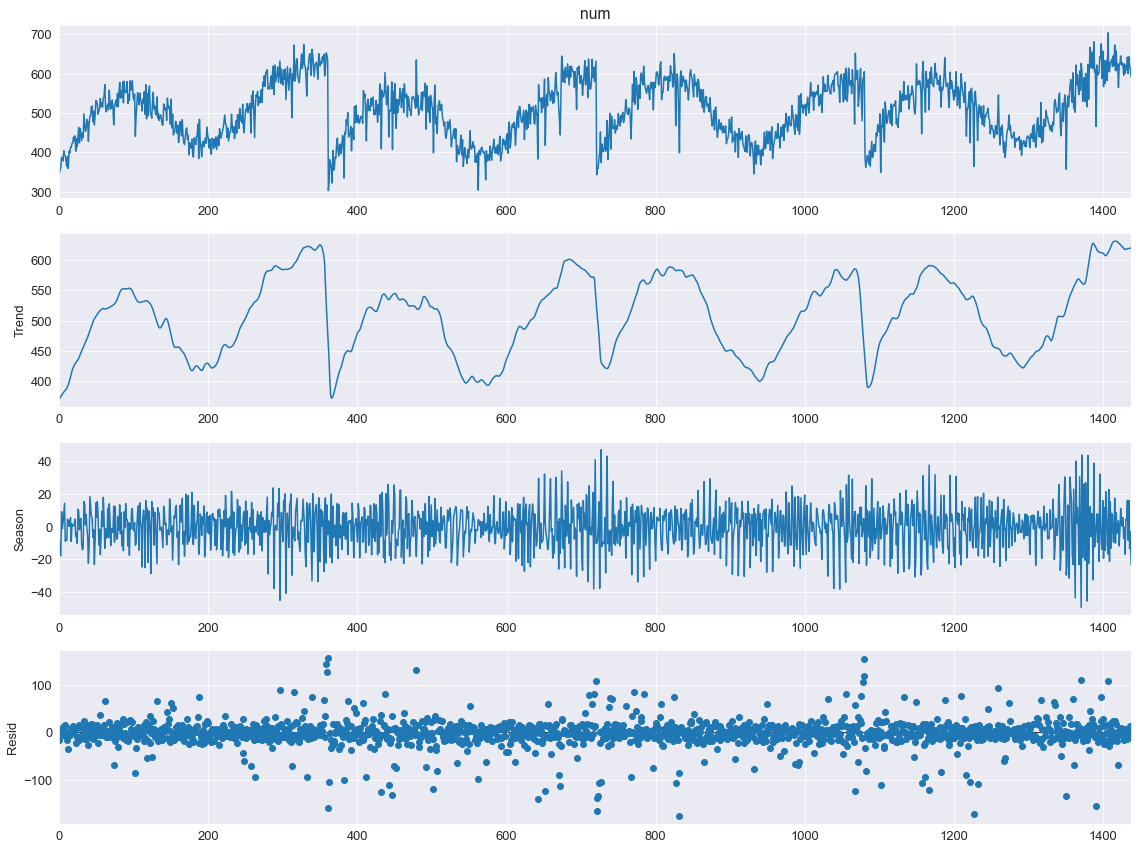

In [48]:
data_train = train_data['num']
data_test = test_data['num']

stl = STL(data_train, period=8 ,robust=True)
res = stl.fit()
fig = res.plot()

ub_num = np.max(res.resid)
lb_num = np.min(res.resid)
print(ub_num, lb_num)

0.504447 0.4909 0.6062533009034051
0.511728 9.8481 0.845442280945758


6.9519602979639 -0.9277249313330769
0.13884490490831167


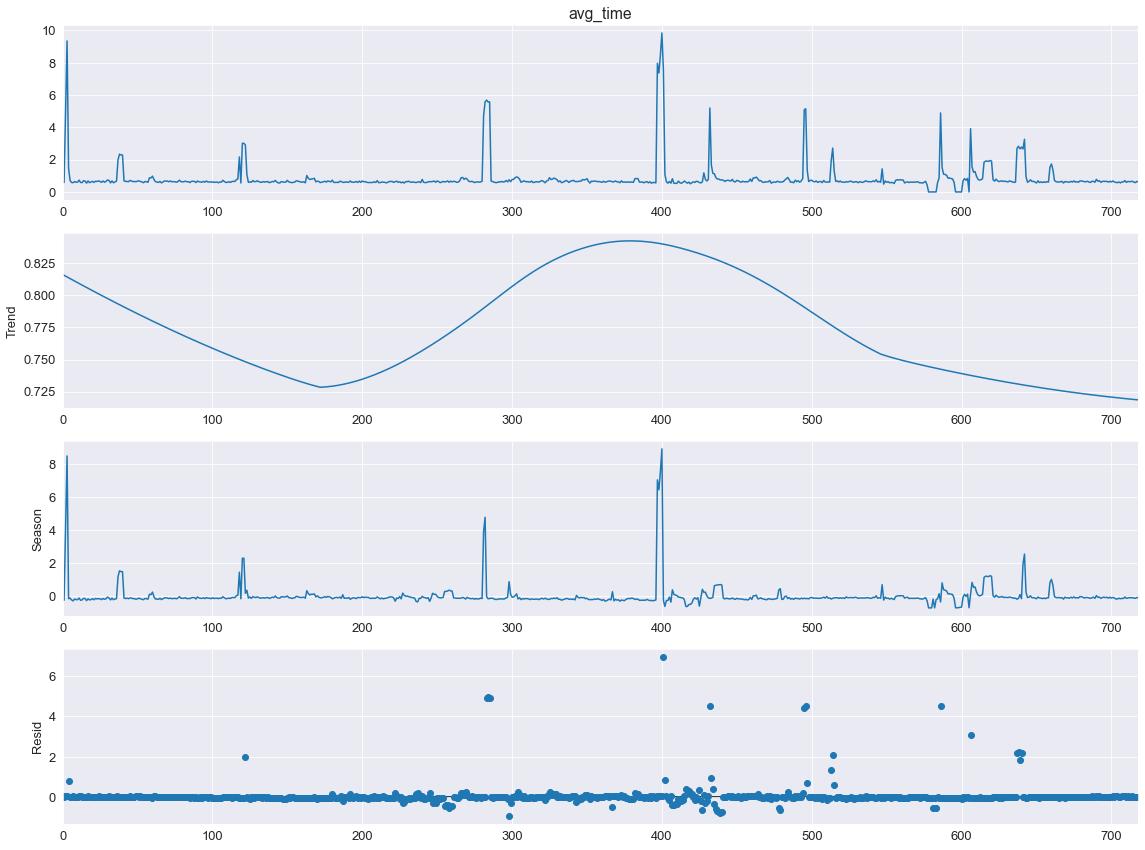

In [68]:
data_train = train_data['avg_time']
data_test = test_data['avg_time']
stl = STL(data_test, period=180 ,robust=True)
res = stl.fit()
fig = res.plot()

ub_avgt = np.max(res.resid)
lb_avgt = np.min(res.resid)
print(ub_avgt, lb_avgt)
print(np.mean(np.abs(res.resid)))

In [64]:
scores = []
for i in [(x+1)*10 for x in range(20)]:
    data_train = train_data['avg_time']
    stl = STL(data_train, period=i ,robust=True)
    res = stl.fit()
    scores.append((i, np.mean(np.abs(res.resid)), np.max(np.abs(res.resid))))
scores

[(10, 0.021437569783823728, 0.33615894019910975),
 (20, 0.022819787916563024, 0.3227309314770759),
 (30, 0.02253285260673586, 0.3452077167595571),
 (40, 0.023516684108012, 0.3220116718824474),
 (50, 0.023152612568340343, 0.3235585828328881),
 (60, 0.022290478072608852, 0.333979770488645),
 (70, 0.022887432512252493, 0.34251947819897643),
 (80, 0.02356006557899879, 0.30797995197723904),
 (90, 0.023227455801695183, 0.3080531021524038),
 (100, 0.023920508396967417, 0.3183305558417925),
 (110, 0.024185152734023666, 0.34556804995581636),
 (120, 0.023617739043275757, 0.34558196390312834),
 (130, 0.023905193456040287, 0.31187208218532214),
 (140, 0.023770441032961255, 0.3158786675565649),
 (150, 0.02334170934654444, 0.31741924646842934),
 (160, 0.023547312100551814, 0.32248697355581535),
 (170, 0.02292426922081182, 0.35100957796090726),
 (180, 0.02220343694716335, 0.2777517930253476),
 (190, 0.02225656641660764, 0.3351538321204395),
 (200, 0.022881567387540346, 0.34179839178176996)]

719
0     -0.006874
1      0.003944
2      4.375067
3      8.723264
4      0.813847
         ...   
714    0.034803
715   -0.020459
716   -0.056379
717    0.002864
718    0.342336
Name: resid, Length: 719, dtype: float64 9.281093867152148
[]


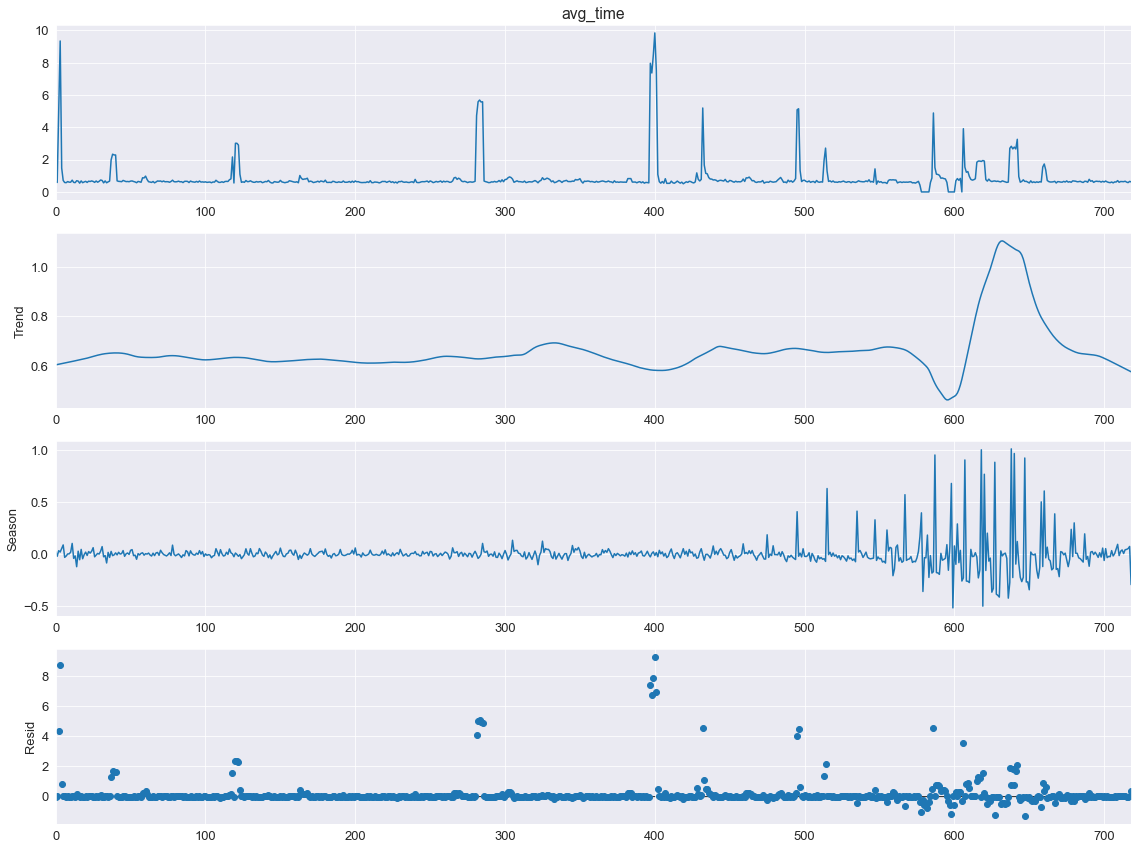

In [43]:
window = data_test
print(len(window))
stl = STL(window, period=20, robust=True)
res = stl.fit()
fig = res.plot()

print(res.resid, np.max(res.resid))

# anoms = []
# for i in range(len(res.resid)):
#     if res.resid[i] > ub_avgt or res.resid[i] < lb_avgt:
#         anoms.append((i, res.resid[i]))
        
print(anoms)

In [12]:
def get_onehot(df):
    df['start_time'] = pd.to_datetime(df['start_time'], unit='ms', origin='unix')
    df = df.sort_values(by='start_time')
    df = df.set_index('start_time')
    return df

def get_resid(df):
    stl = STL(df['avg_time'], period=8, robust=True)
    res_avgt = stl.fit()

    stl = STL(df['num'], period=8, robust=True)
    res_num = stl.fit()

    return res_avgt.resid, res_num.resid

def num_anom(resid):
    upper_bound = 158
    lower_bound = -177
    
    if resid[-1] >= upper_bound or resid[-1] <= lower_bound:
        return True
    return False

def avgt_anom(resid):
    upper_bound = .321
    lower_bound = -.144
    
    if resid[-1] >= upper_bound or resid[-1] <= lower_bound:
        return True

    return False

def find_anom(df):
    df = get_onehot(df)
    avgt_resid, num_resid = get_resid(df)

    is_avgt = avgt_anom(avgt_resid)
    is_num = num_anom(num_resid)
    is_sr = df['succee_rate'].values[-1] < 1

    return is_avgt or is_num or is_sr

In [13]:
for i in range(40, 720):
    print(i, find_anom(test_data.head(i)))

<ipython-input-12-db833cae6d50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_time'] = pd.to_datetime(df['start_time'], unit='ms', origin='unix')


40 False
41 False
42 True
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 True
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False
111 False
112 False
113 False
114 False
115 False
116 False
117 False
118 False
119 True
120 True
121 True
122 True
123 True
124 True
125 True
126 True
127 True
128 True
129 True
130 True
131 True
132 True
133 True
134 True
135 True
136 True
137 True
138 True
139 True
140 True
141 True
142 True
143 True
144 True
145 True
146 True
147 True
148 True
14

In [ ]:
x